In [11]:
import manifpy as manif
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import transforms3d as tf
%matplotlib widget

In [12]:
def visualize_rotation(R, i):
    ax.quiver(0, 0, 0, R[0, 0], R[1, 0], R[2, 0], color='red', arrow_length_ratio=0.1, alpha=i)
    ax.quiver(0, 0, 0, R[0, 1], R[1, 1], R[2, 1], color='green', arrow_length_ratio=0.1, alpha=i)
    ax.quiver(0, 0, 0, R[0, 2], R[1, 2], R[2, 2], color='blue', arrow_length_ratio=0.1, alpha=i)
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

A simple example showing how one can't interpolate between two matrix representations. 

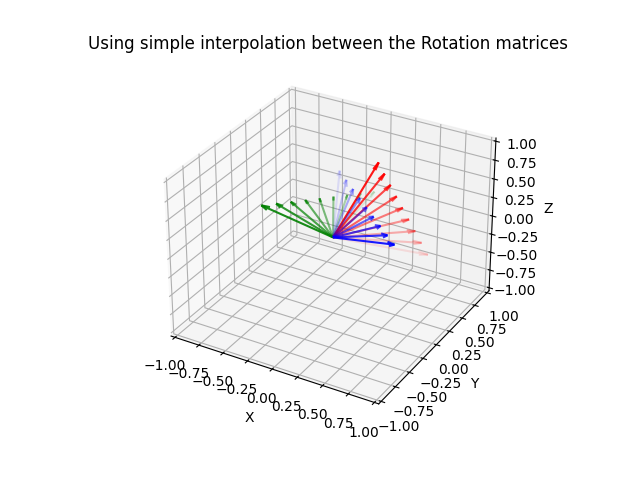

In [13]:
Matrix_start = tf.euler.euler2mat(0,0,0)
Matrix_end = tf.euler.euler2mat(np.pi/3, -np.pi/4, np.pi/2)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in np.arange(0, 1, 0.1):
    intermediate = Matrix_start + (Matrix_end - Matrix_start) * i
    visualize_rotation(intermediate, i)
ax.set_title('Using simple interpolation between the Rotation matrices')
plt.show()


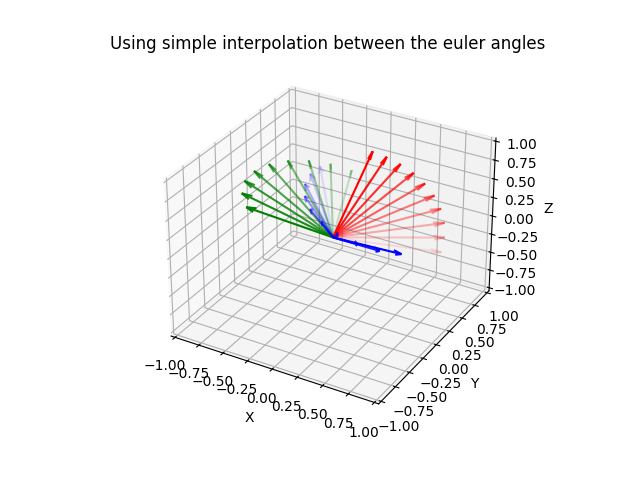

In [14]:
Euler_start = np.array([0,0,0])
Euler_end = np.array([np.pi/3, -np.pi/4, np.pi/2])

interpol_eul = []

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in np.arange(0, 1.1, 0.1):
    intermediate = Euler_start + (Euler_end - Euler_start) * i
    rotmat = tf.euler.euler2mat(intermediate[0], intermediate[1], intermediate[2])
    visualize_rotation(rotmat, i)
    interpol_eul.append(rotmat)
ax.set_title('Using simple interpolation between the euler angles')
plt.show()

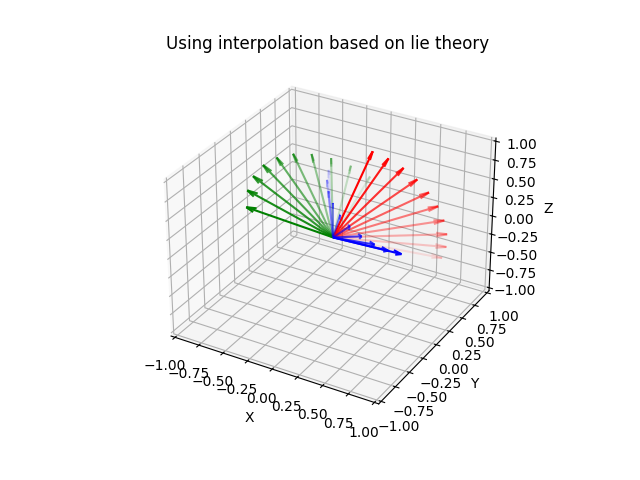

In [15]:
Matrix_start = manif.SO3.Identity()
Matrix_end = manif.SO3(np.pi/3, -np.pi/4, np.pi/2)
interpol_lie = []
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in np.arange(0, 1.1, 0.1):
    intermediate = Matrix_start.plus(i * Matrix_end.minus(Matrix_start))
    visualize_rotation(intermediate.rotation(), i)
    interpol_lie.append(intermediate.rotation())
ax.set_title('Using interpolation based on lie theory')
plt.show()

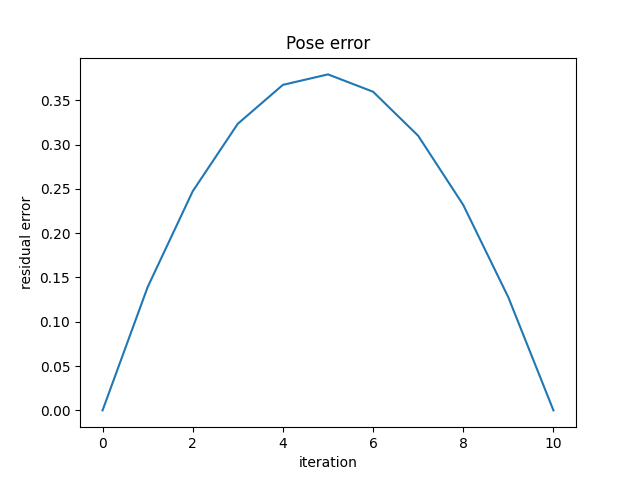

In [16]:
plt.figure()
residual = np.array(interpol_lie) - np.array(interpol_eul)
e = [np.linalg.norm(res) for res in residual]
plt.plot(e)
plt.title("Pose error")
plt.xlabel("iteration")
plt.ylabel("residual error")

plt.show()

The pose error is the norm of the differences of the rotation matrices. As we can see we get quite a difference between the Lie algebra pose interpolation and the one based on only interpolating the euler angles.

In addition there also are other problems present, such as the gimbal lock